# Seeds Clustering

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import style 
import seaborn as sns

style.use("ggplot")
%matplotlib inline

In [2]:
df = pd.read_csv("./data/seeds.csv")

In [3]:
df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [4]:
df.columns

Index(['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width',
       'asymmetry_coefficient', 'groove_length', 'species'],
      dtype='object')

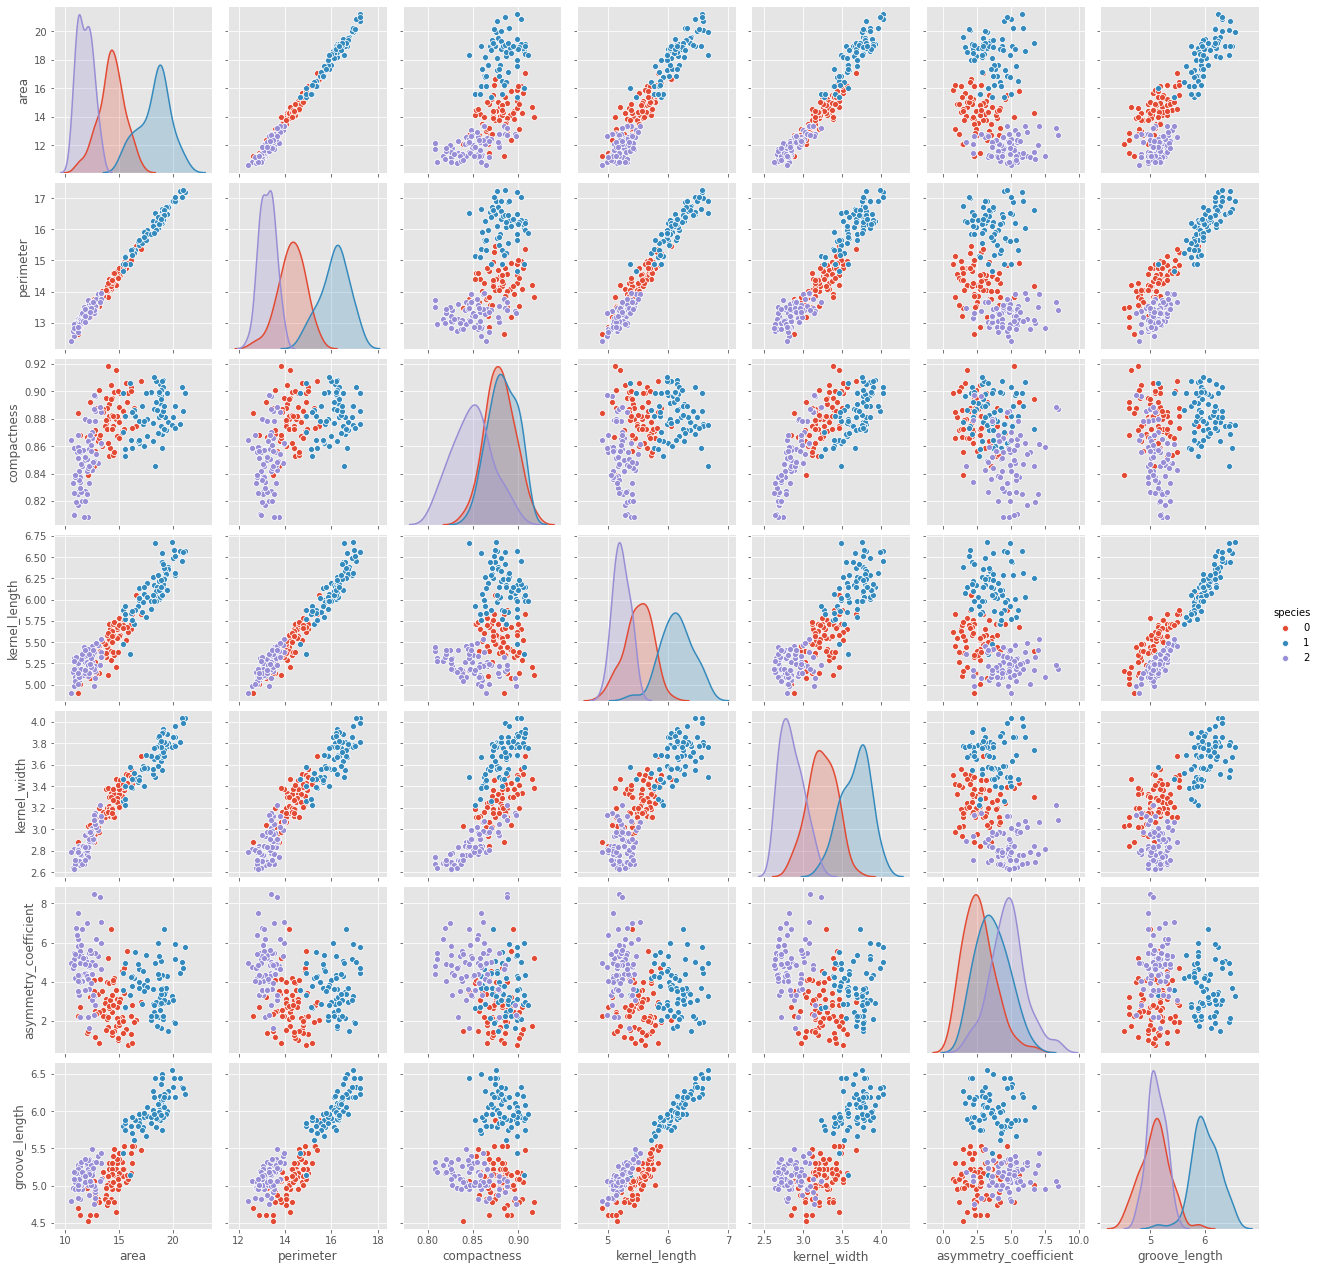

In [5]:
sns.pairplot(df,hue='species')

In [6]:
X = df[['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width','asymmetry_coefficient', 'groove_length']].values

y = df['species'].values

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

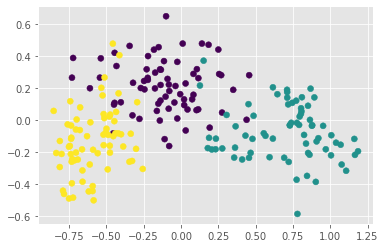

In [8]:
X_scaled = MinMaxScaler().fit_transform(X)
X_PC = PCA(n_components=2).fit_transform(X_scaled)
plt.scatter(X_PC[:,[0]],X_PC[:,[1]],c=y)

> A metric often used to measure this tightness is the within cluster sum of squares (WCSS), with lower values meaning that the data points are closer. You can then plot the WCSS for each model.

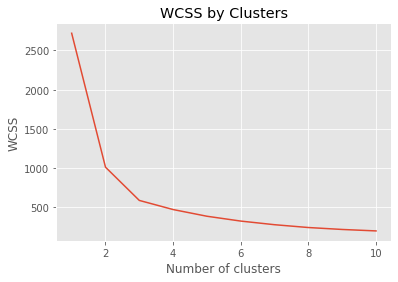

In [9]:
from sklearn.cluster import KMeans


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(X)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_PC,y,test_size=0.3,random_state=11)

In [11]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3,n_init=100,max_iter=1000).fit(X_train,X_test)

In [12]:
model

KMeans(max_iter=1000, n_clusters=3, n_init=100)

In [13]:
cluster_centers = model.cluster_centers_
cluster_centers

array([[-0.5753663 , -0.13409566],
       [ 0.75742129, -0.06427225],
       [-0.01706153,  0.17004815]])

In [14]:
model.inertia_

10.403928762576893

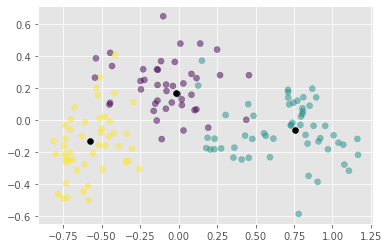

In [15]:
fig,ax = plt.subplots(1,1)
ax.scatter(X_train[:,[0]],X_train[:,[1]],c=y_train,alpha=0.5)
ax.scatter(cluster_centers[:,[0]],cluster_centers[:,[1]],c='k')
plt.show()

In [16]:
y_pred = model.predict(X_test)

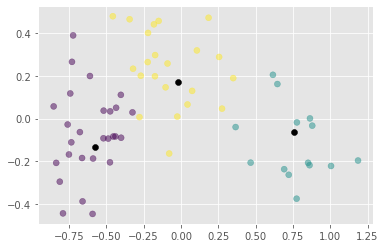

In [17]:
fig,ax = plt.subplots(1,1)
ax.scatter(X_test[:,[0]],X_test[:,[1]],c=y_pred,alpha=0.5)
ax.scatter(cluster_centers[:,[0]],cluster_centers[:,[1]],c='k')
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(X_train)
agg_clusters

array([0, 1, 0, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2,
       1, 2, 2, 1, 1, 1, 0, 2, 0, 0, 2, 2, 1, 2, 0, 2, 1, 1, 0, 2, 2, 1,
       1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1, 1, 0, 0, 0, 1, 0,
       0, 2, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 2, 1, 1, 0, 1,
       0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 2, 1, 1, 2, 1, 1, 0, 0, 0, 2,
       2, 1, 0, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2, 1, 0, 0, 1, 2,
       2, 0, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 0, 2, 2])